In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
salt_df = pd.read_csv('/content/salt.csv')

In [ ]:
salt_df.head()

,Time,Salt Flux
0,3600,0.224401095789779
1,7200,0.076457109624893
2,10800,0.06423850262469
3,14400,0
4,18000,0


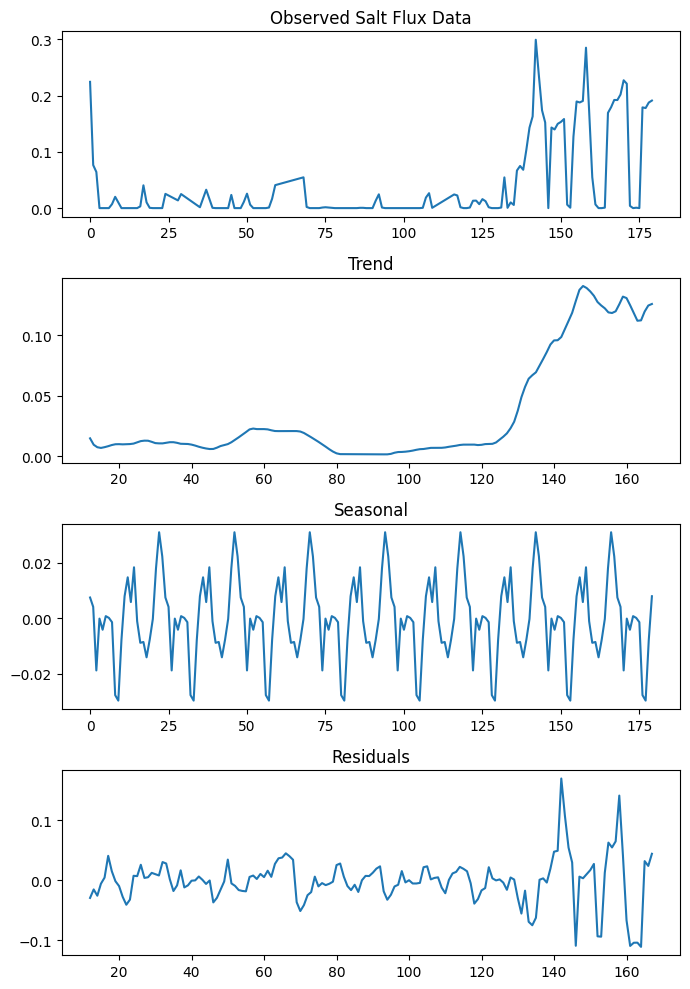

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

salt_df = pd.read_csv("salt.csv")

salt_df["Salt Flux"] = pd.to_numeric(salt_df["Salt Flux"], errors="coerce")
salt_df.interpolate(method="linear", inplace=True)

decomposition_no_conversion = seasonal_decompose(salt_df["Salt Flux"], period=24, model="additive")



fig, axes = plt.subplots(4, 1, figsize=(7, 10))

axes[0].plot(decomposition_no_conversion.observed); axes[0].set_title("Observed Salt Flux Data")
axes[1].plot(decomposition_no_conversion.trend); axes[1].set_title("Trend")
axes[2].plot(decomposition_no_conversion.seasonal); axes[2].set_title("Seasonal")
axes[3].plot(decomposition_no_conversion.resid); axes[3].set_title("Residuals")


plt.tight_layout()
plt.show()

In [ ]:
salt_df['Salt Flux'] = pd.to_numeric(salt_df['Salt Flux'], errors='coerce')
salt_df['Salt Flux'] = salt_df['Salt Flux'].interpolate(method='linear')
adf_salt = adfuller(salt_df['Salt Flux'].dropna())
print(f'ADF Statistic for Salt Flux: {adf_salt[0]}')
print(f'p-value: {adf_salt[1]}')

ADF Statistic for Salt Flux: -0.920922630864505
p-value: 0.7810042363601197


In [ ]:
salt_df['Salt Flux Differenced'] = salt_df['Salt Flux'].diff()
adf_salt_diff = adfuller(salt_df['Salt Flux Differenced'].dropna())
print(f'ADF Statistic for Salt Flux Differenced: {adf_salt_diff[0]}')
print(f'p-value: {adf_salt_diff[1]}')

ADF Statistic for Salt Flux Differenced: -5.206415668918679
p-value: 8.530757801402829e-06


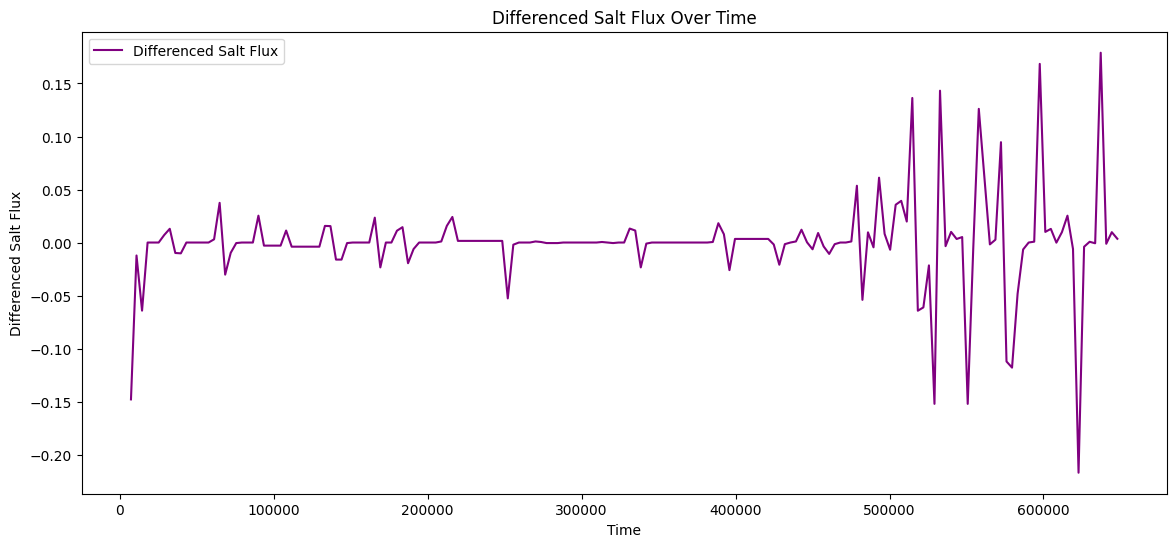

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(salt_df['Time'], salt_df['Salt Flux Differenced'], label="Differenced Salt Flux", color="purple")
plt.title("Differenced Salt Flux Over Time")
plt.xlabel("Time")
plt.ylabel("Differenced Salt Flux")
plt.legend()
plt.show()

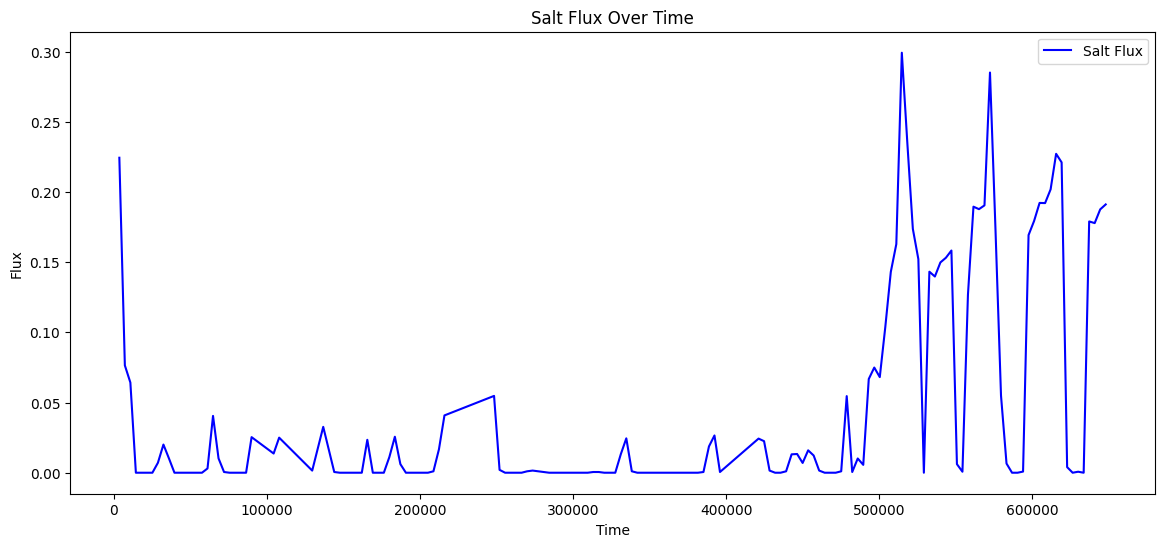

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(salt_df['Time'], salt_df['Salt Flux'], label="Salt Flux", color="b")
plt.title("Salt Flux Over Time")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.legend()
plt.show()

In [ ]:
salt_df['Salt Flux Differenced'] = salt_df['Salt Flux'].diff(12)
salt_df.dropna(subset=['Salt Flux Differenced'], inplace=True)
result = adfuller(salt_df['Salt Flux Differenced'])
print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

ADF Statistic: -3.2606634838743127, p-value: 0.016731031601170388


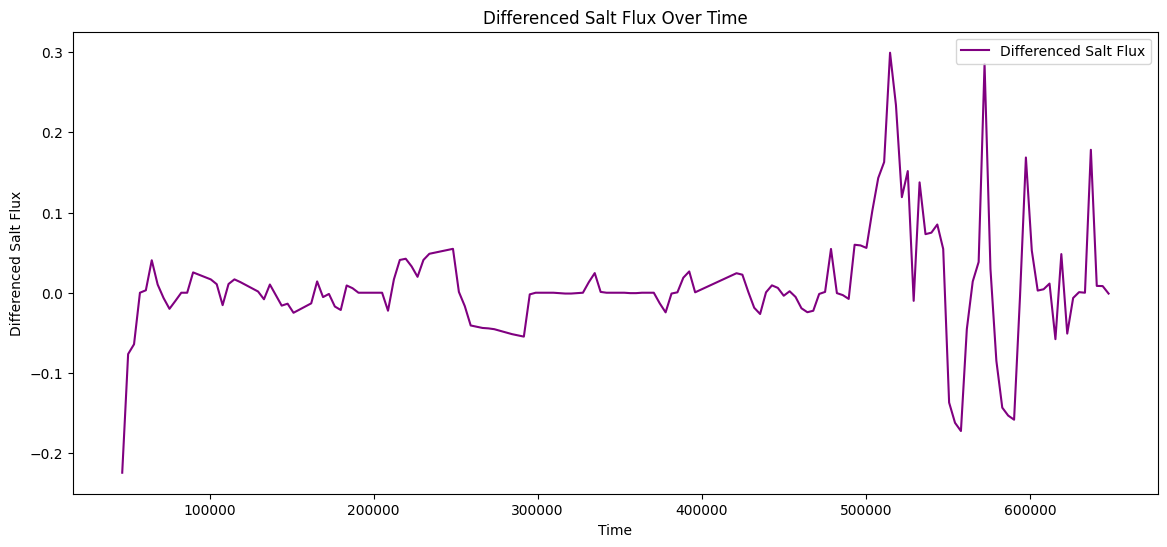

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(salt_df['Time'], salt_df['Salt Flux Differenced'], label="Differenced Salt Flux", color="purple")
plt.title("Differenced Salt Flux Over Time")
plt.xlabel("Time")
plt.ylabel("Differenced Salt Flux")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

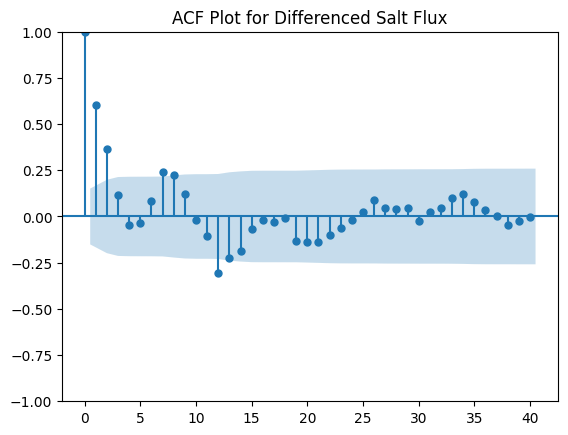

<Figure size 1200x600 with 0 Axes>

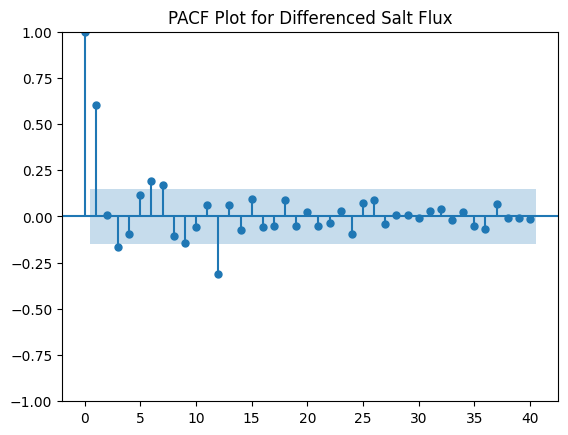

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(salt_df['Salt Flux Differenced'].dropna(), lags=40)
plt.title("ACF Plot for Differenced Salt Flux")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(salt_df['Salt Flux Differenced'].dropna(), lags=40)
plt.title("PACF Plot for Differenced Salt Flux")
plt.show()


In [ ]:
from pmdarima.arima import auto_arima
SARIMA_model = auto_arima(salt_df["Salt Flux Differenced"], start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5,
                         m=24,
                         start_P=1, start_Q=1,
                         max_P = 5, max_Q=5,
                         seasonal=True,
                         d=1,
                         D=1,
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)
SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 24)   Log Likelihood                 200.147
Date:                             Fri, 29 Nov 2024   AIC                           -390.294
Time:                                     09:57:50   BIC                           -375.480
Sample:                                          0   HQIC                          -384.274
                                             - 168                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6812      0.054     12.570      0.000       0.575       0.787
ma.L1         -0.9898      0.059    -16.769      0.000      -1.105      -0.874
ar.S.L24      -0.6469      0.075     -8.601      0.000      -0.794      -0.500
ar.S.L48      -0.1548      0.334     -0.463      0.643      -0.810       0.501
sigma2         0.0033      0.000     11.808      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               258.31
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               7.12   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima
SARIMA_model = auto_arima(salt_df["Salt Flux Differenced"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3,
                         m=24,
                         start_P=1, start_Q=1,
                         max_P=3, max_Q=3,
                         seasonal=True,
                         d=1,
                         D=1,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(SARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[24]             : AIC=-390.020, Time=12.03 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=-353.821, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=-377.278, Time=1.15 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=-375.780, Time=3.21 sec
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=-388.998, Time=7.81 sec
 ARIMA(1,1,1)(1,1,0)[24]             : AIC=inf, Time=4.52 sec
 ARIMA(1,1,1)(2,1,1)[24]             : AIC=-388.523, Time=21.23 sec
 ARIMA(1,1,1)(1,1,2)[24]             : AIC=-387.612, Time=21.05 sec
 ARIMA(1,1,1)(0,1,0)[24]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,1)(0,1,2)[24]             : AIC=inf, Time=21.11 sec
 ARIMA(1,1,1)(2,1,0)[24]             : AIC=-390.294, Time=16.70 sec
 ARIMA(1,1,1)(3,1,0)[24]             : AIC=-387.619, Time=32.01 sec
 ARIMA(1,1,1)(3,1,1)[24]             : AIC=inf, Time=34.07 sec
 ARIMA(0,1,1)(2,1,0)[24]             : AIC=-318.493, Time=3.53 sec
 ARIMA(1,1,0)(2,1,0)[24]        

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


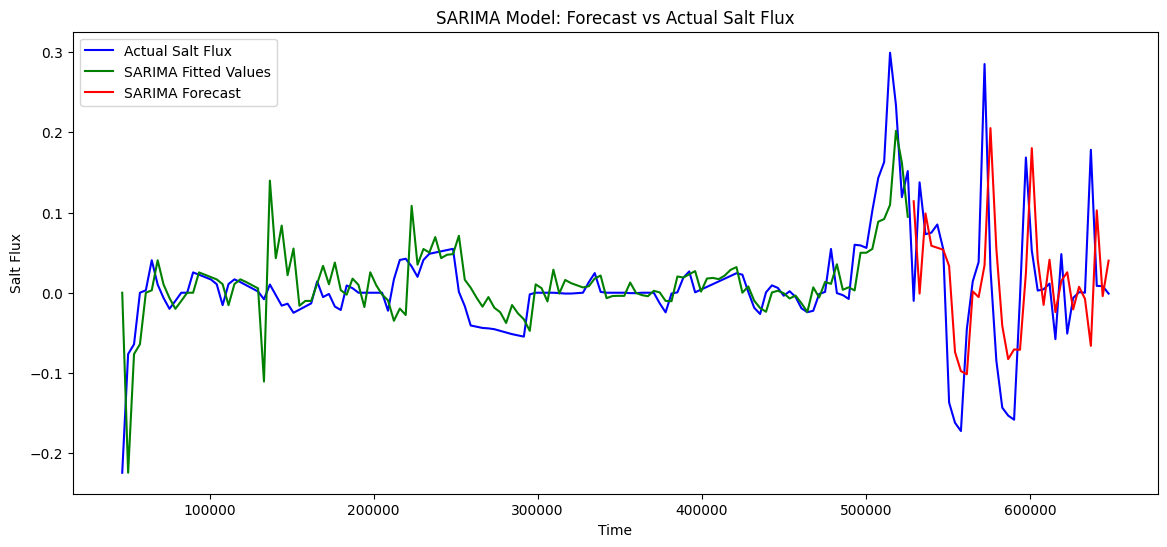

In [ ]:
train_size = int(len(salt_df) * 0.8)
train, test = salt_df['Salt Flux Differenced'][:train_size], salt_df['Salt Flux Differenced'][train_size:]

P, D, Q, S = 2, 1, 0, 24
p, d, q = 1, 1, 1

sarima_model = SARIMAX(salt_df['Salt Flux Differenced'], order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit()


sarima_fitted_values = sarima_result.predict(start=0, end=train_size - 1)


sarima_forecast = sarima_result.predict(start=train_size, end=len(salt_df)-1,type='levels')

plt.figure(figsize=(14, 6))
plt.plot(salt_df['Time'], salt_df['Salt Flux Differenced'], label="Actual Salt Flux", color="blue")


plt.plot(salt_df['Time'][:train_size], sarima_fitted_values, label="SARIMA Fitted Values", color="green")

plt.plot(salt_df['Time'][train_size:], sarima_forecast, label="SARIMA Forecast", color="red")

plt.title("SARIMA Model: Forecast vs Actual Salt Flux")
plt.xlabel("Time")
plt.ylabel("Salt Flux")
plt.legend()
plt.show()

In [ ]:
mae_test = mean_absolute_error(test, sarima_forecast)
mse_test = mean_squared_error(test, sarima_forecast)
rmse_test = np.sqrt(mse_test)
print(f"Test MAE: {mae_test:}")
print(f"Test MSE: {mse_test:}")
print(f"Test RMSE: {rmse_test:}")

Test MAE: 0.076352953785678
Test MSE: 0.010095359657955003
Test RMSE: 0.10047566699432756


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def mae(actual, predicted):
    return mean_absolute_error(actual, predicted)

def mse(actual, predicted):
    return mean_squared_error(actual, predicted)

def r2(actual, predicted):
    return r2_score(actual, predicted)

def nrmse(actual, predicted):
    return rmse(actual, predicted) / (np.max(actual) - np.min(actual))

def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    epsilon = 1e-10
    actual_modified = np.where(actual == 0, epsilon, actual)
    return np.mean(np.abs((actual_modified - predicted) / actual_modified)) * 100


def mase(actual, predicted, seasonal_period=1):
    n = len(actual)
    errors = np.abs(actual - predicted)
    naive_errors = np.abs(actual[seasonal_period:] - actual[:-seasonal_period])
    naive_errors[naive_errors == 0] = 1e-10

    return np.mean(errors / np.mean(naive_errors))

def mfe(actual, predicted):
    return np.mean(actual - predicted)

def mpe(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    epsilon = 1e-10
    actual_modified = np.where(actual == 0, epsilon, actual)
    return np.mean((actual_modified - predicted) / actual_modified) * 100

def medae(actual, predicted):
    return np.median(np.abs(actual - predicted))

def mapd(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    epsilon = 1e-10
    actual_modified = np.where(actual == 0, epsilon, actual)
    return np.mean(np.abs((actual_modified - predicted) / actual_modified)) * 100

def tic(actual, predicted):
    numerator = np.sqrt(np.mean((predicted - actual)**2))
    denominator = np.sqrt(np.mean(predicted**2)) + np.sqrt(np.mean(actual**2))
    return numerator / denominator

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = {}

results= {
        'RMSE': rmse(test, sarima_forecast),
        'MAE': mae(test, sarima_forecast),
        'MSE': mse(test, sarima_forecast),
        'R-squared': r2(test, sarima_forecast),
        'NRMSE': nrmse(test, sarima_forecast),
        'MedAE': medae(test, sarima_forecast),
        'TIC': tic(test, sarima_forecast)
    }


for metric_name, value in results.items():
  print(f"  {metric_name}: {value:.4f}")

  RMSE: 0.1005
  MAE: 0.0764
  MSE: 0.0101
  R-squared: 0.0149
  NRMSE: 0.2196
  MedAE: 0.0611
  TIC: 0.5781


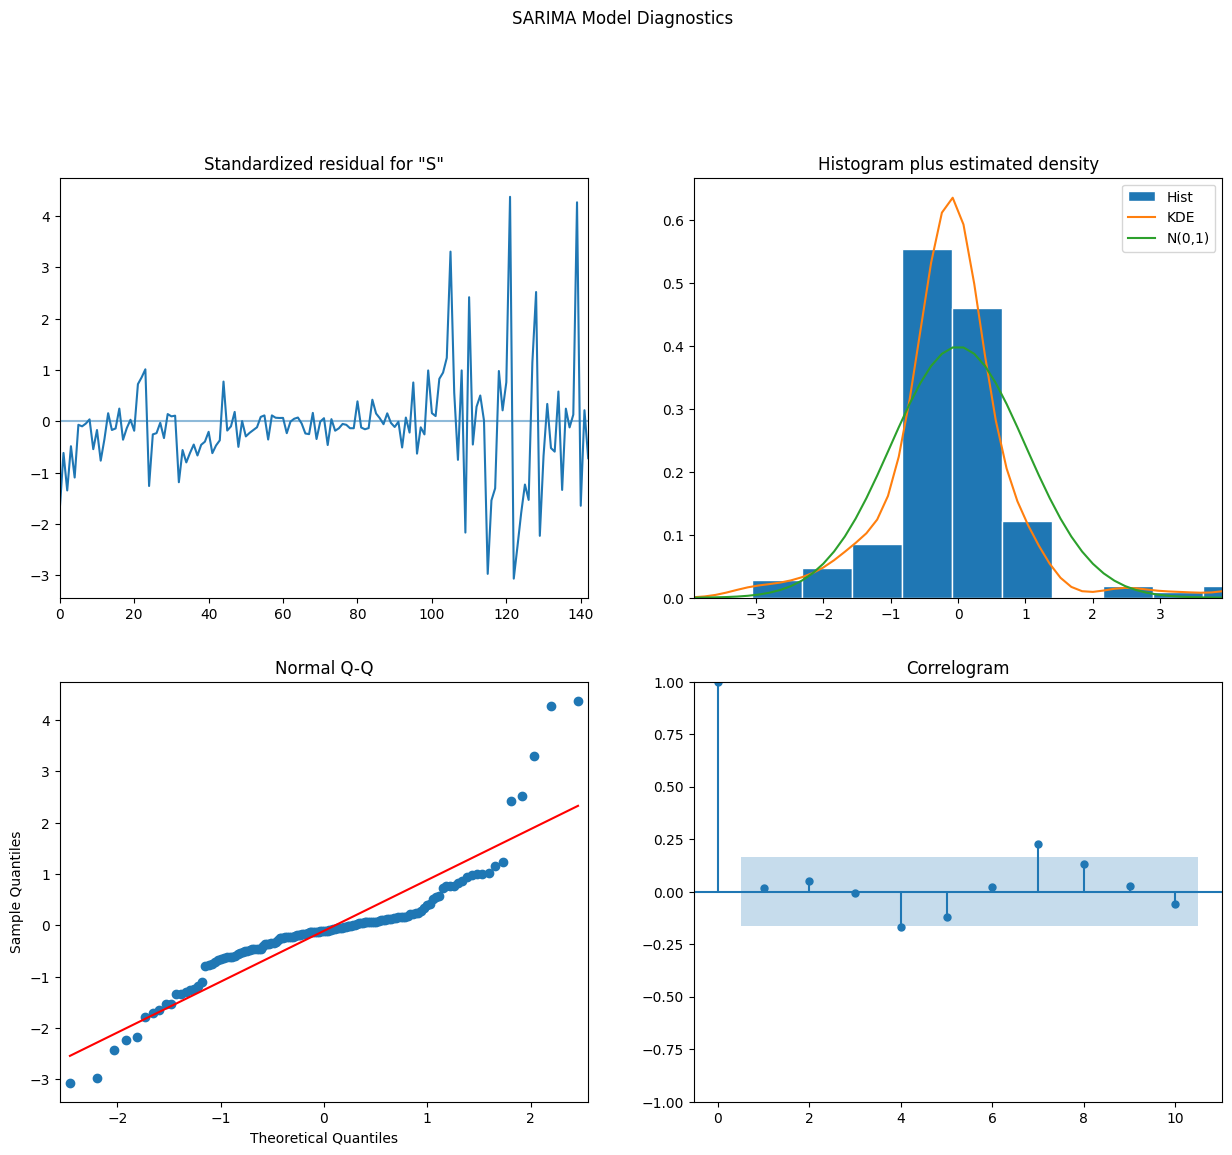

In [ ]:
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.suptitle("SARIMA Model Diagnostics", y=1.02)
plt.show()

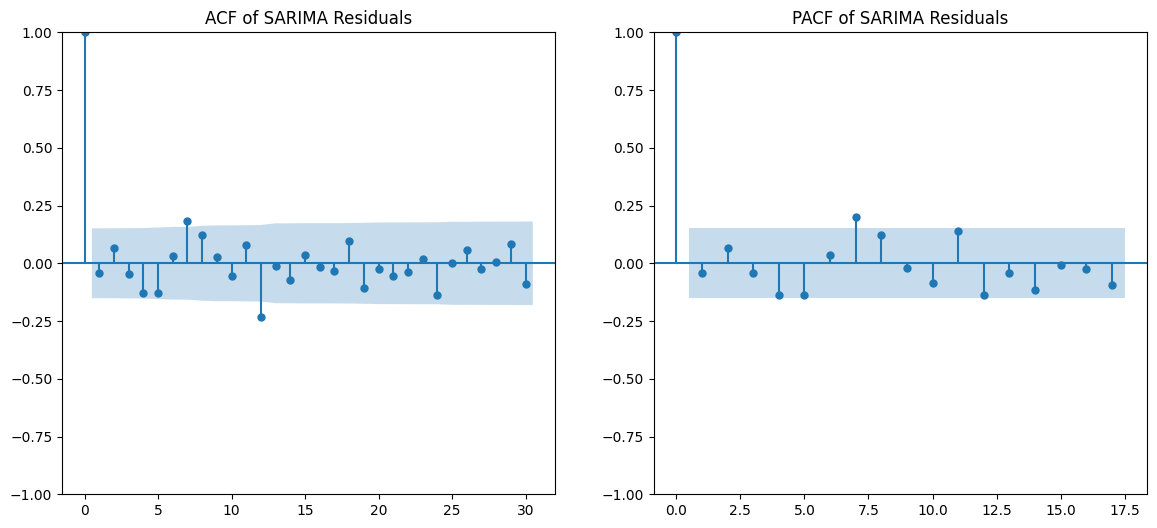

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


residuals = sarima_result.resid

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_acf(residuals, lags=30, ax=axes[0])
axes[0].set_title("ACF of SARIMA Residuals")

plot_pacf(residuals, lags=17.5, ax=axes[1])
axes[1].set_title("PACF of SARIMA Residuals")

plt.show()

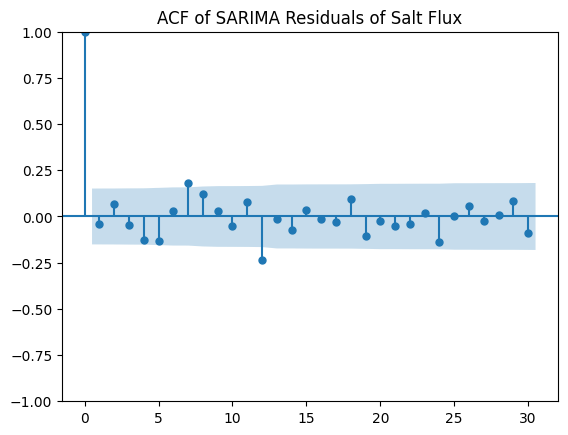

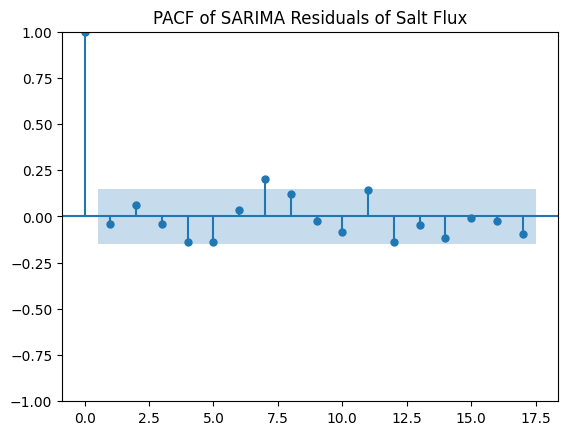

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


residuals = sarima_result.resid

plot_acf(residuals, lags=30)
plt.title("ACF of SARIMA Residuals of Salt Flux")
plt.show()

plot_pacf(residuals, lags=17.5)
plt.title("PACF of SARIMA Residuals of Salt Flux")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


sarima_model = SARIMAX(salt_df['Salt Flux Differenced'],
                       order=(1, 1, 1),
                       seasonal_order=(2, 1, 0, 24))
sarima_result = sarima_model.fit()


sarima_fitted_values = sarima_result.predict(start=0, end=train_size - 1)
sarima_forecast = sarima_result.predict(start=train_size, end=len(salt_df) - 1)

residuals = salt_df['Salt Flux Differenced'] - sarima_result.fittedvalues


salt_df['Lag1'] = salt_df['Salt Flux Differenced'].shift(1)
salt_df['Lag2'] = salt_df['Salt Flux Differenced'].shift(2)
salt_df['RollingMean'] = salt_df['Salt Flux Differenced'].rolling(window=3).mean()
salt_df['Residuals'] = residuals


ml_data = salt_df.dropna()


X = ml_data[['Lag1', 'Lag2','RollingMean']]
y = ml_data['Residuals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.svm import SVR
ml_model = SVR(kernel='rbf')
ml_model.fit(X_train, y_train)


ml_predictions_train = ml_model.predict(X_train)
ml_predictions_test = ml_model.predict(X_test)


sarima_fitted_values_aligned = sarima_fitted_values[ml_data.index[:len(X_train)]]


final_train_predictions = sarima_fitted_values_aligned + ml_predictions_train
final_test_predictions = sarima_forecast + ml_predictions_test


mse_train = mean_squared_error(y_train, ml_predictions_train)
mse_test = mean_squared_error(y_test, ml_predictions_test)
rmse_test=np.sqrt(mse_test)
rmse_train=np.sqrt(mse_train)
mae_train=mean_absolute_error(y_train, ml_predictions_train)
mae_test=mean_absolute_error(y_test, ml_predictions_test)

print(f"Hybrid Model Train RMSE: {rmse_test}")
print(f"Hybrid Model Test RMSE: {rmse_test}")
print(f"Hybrid Model Train MSE: {mse_train}")
print(f"Hybrid Model Test MSE: {mse_test}")
print(f"Hybrid Model Train MAE: {mae_train}")
print(f"Hybrid Model Test MAE: {mae_test}")


results = {}
results= {
        'RMSE': rmse(y_test, ml_predictions_test),
        'MAE': mae(y_test, ml_predictions_test),
        'MSE': mse(y_test, ml_predictions_test),
        'NRMSE': nrmse(y_test, ml_predictions_test),
        'MedAE': medae(y_test, ml_predictions_test),
        'TIC': tic(y_test, ml_predictions_test)
    }


for metric_name, value in results.items():
  print(f"  {metric_name}: {value:.4f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hybrid Model Train RMSE: 0.04270808968934744
Hybrid Model Test RMSE: 0.04270808968934744
Hybrid Model Train MSE: 0.0016349022715129045
Hybrid Model Test MSE: 0.001823980924913345
Hybrid Model Train MAE: 0.029999615487603635
Hybrid Model Test MAE: 0.03001851851992097
  RMSE: 0.0427
  MAE: 0.0300
  MSE: 0.0018
  NRMSE: 0.1240
  MedAE: 0.0220
  TIC: 0.5642


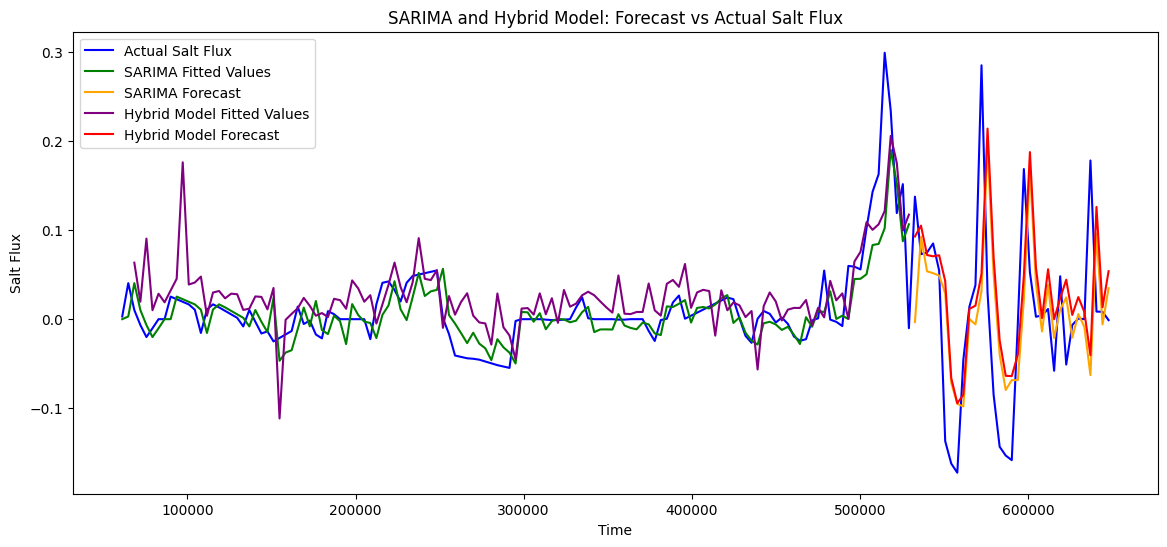

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(salt_df['Time'], salt_df['Salt Flux Differenced'], label="Actual Salt Flux", color="blue")

plt.plot(salt_df['Time'][:train_size], sarima_fitted_values, label="SARIMA Fitted Values", color="green")

plt.plot(salt_df['Time'][train_size:], sarima_forecast, label="SARIMA Forecast", color="orange")

train_indices = ml_data.index[:len(X_train)]
plt.plot(salt_df['Time'][train_indices], final_train_predictions, label="Hybrid Model Fitted Values", color="purple")

test_indices = ml_data.index[len(X_train):]
plt.plot(salt_df['Time'][test_indices], final_test_predictions, label="Hybrid Model Forecast", color="red")

plt.title("SARIMA and Hybrid Model: Forecast vs Actual Salt Flux")
plt.xlabel("Time")
plt.ylabel("Salt Flux")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ml_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validated RMSE: {np.sqrt(-cv_scores.mean()):.4f}")

Cross-Validated RMSE: 0.0666


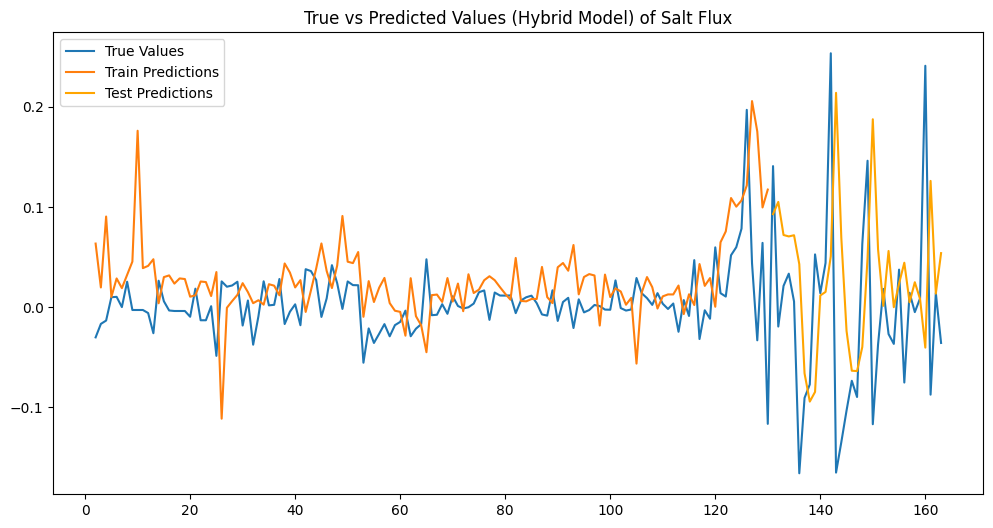

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ml_data.index, y, label="True Values")
plt.plot(ml_data.index[:len(y_train)], final_train_predictions, label="Train Predictions")
plt.plot(ml_data.index[len(y_train):], final_test_predictions, label="Test Predictions", color='orange')
plt.legend()
plt.title("True vs Predicted Values (Hybrid Model) of Salt Flux")
plt.show()

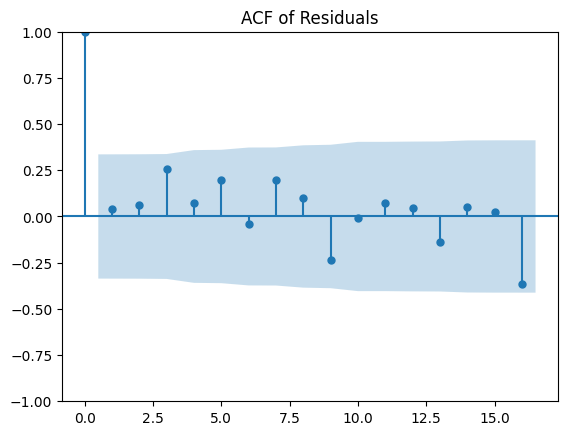

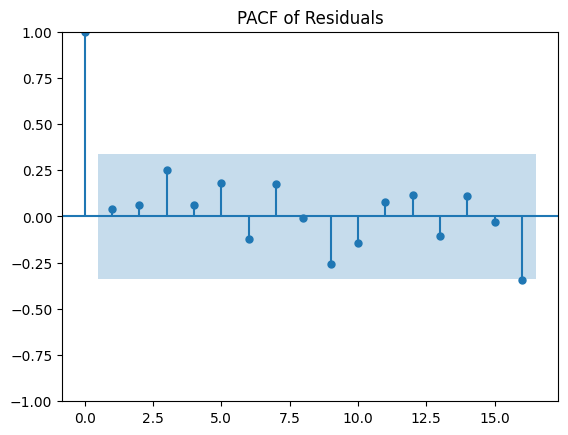

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_test - ml_predictions_test)
plt.title("ACF of Residuals")
plt.show()

plot_pacf(y_test - ml_predictions_test)
plt.title("PACF of Residuals")
plt.show()

<Figure size 1200x500 with 0 Axes>

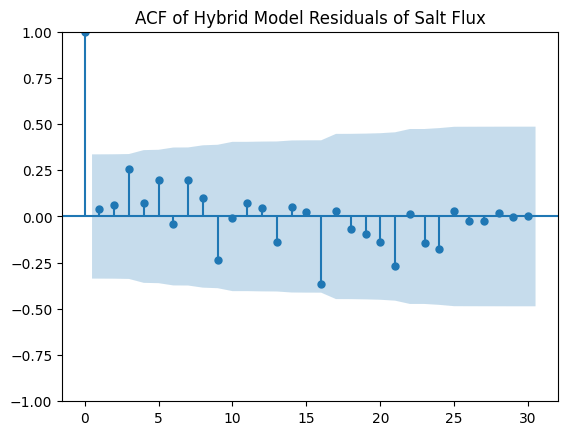

<Figure size 1200x500 with 0 Axes>

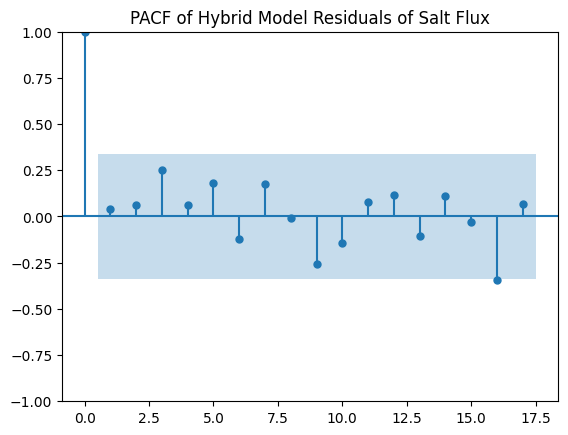

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals=y_test - ml_predictions_test

plt.figure(figsize=(12, 5))
plot_acf(residuals.dropna(), lags=30)
plt.title("ACF of Hybrid Model Residuals of Salt Flux")
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(residuals.dropna(), lags=17.5)
plt.title("PACF of Hybrid Model Residuals of Salt Flux")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

n_lags = 2


for i in range(1, n_lags + 1):
    salt_df[f'Lag_{i}'] = salt_df['Salt Flux'].shift(i)

salt_df['RollingMean'] = salt_df['Salt Flux'].rolling(window=n_lags).mean()

salt_df.dropna(inplace=True)
salt_df.reset_index(drop=True, inplace=True)

X = salt_df[['Lag_1', 'Lag_2', 'RollingMean']]
y = salt_df['Salt Flux']

train_size = int(len(salt_df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)


y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"SVR with Lagged Features - RMSE: {rmse:.4f}, MAE: {mae:.4f}")

SVR with Lagged Features - RMSE: 0.0718, MAE: 0.0608


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

def rmse(actual, predicted):
  return np.sqrt(mean_squared_error(actual, predicted))

def mae(actual, predicted):
  return mean_absolute_error(actual, predicted)

def mse(actual, predicted):
  return mean_squared_error(actual, predicted)



results= {
        'RMSE': rmse(y_test, y_pred),
        'MAE': mae(y_test, y_pred),
        'MSE': mse(y_test, y_pred),
        'NRMSE': nrmse(y_test, y_pred),
        'MedAE': medae(y_test, y_pred),
        'TIC': tic(y_test, y_pred)
    }


for metric_name, value in results.items():
  print(f"  {metric_name}: {value:.4f}")

  RMSE: 0.0718
  MAE: 0.0608
  MSE: 0.0052
  NRMSE: 0.2519
  MedAE: 0.0517
  TIC: 0.2504


<Figure size 1200x500 with 0 Axes>

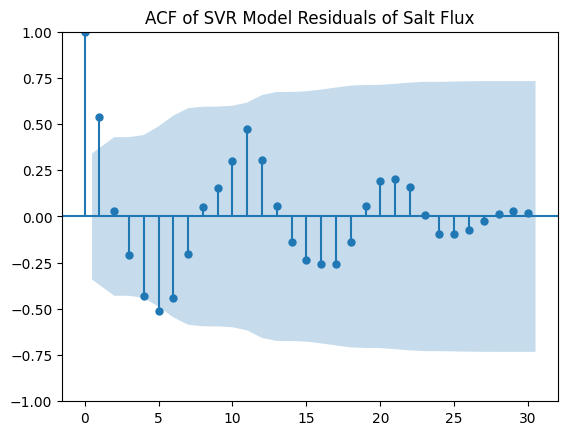

<Figure size 1200x500 with 0 Axes>

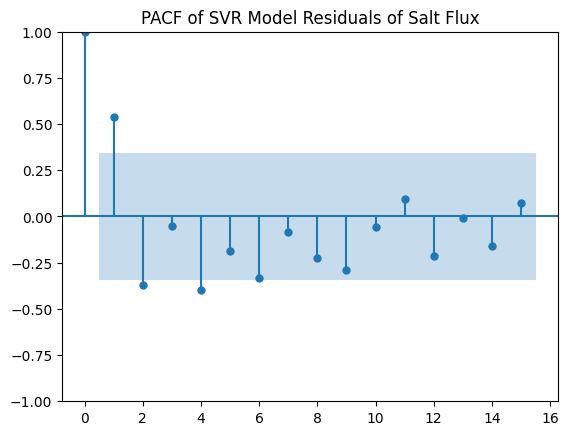

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = y_test - y_pred

residuals = residuals.dropna()
max_lags = min(30, len(residuals) // 5)

plt.figure(figsize=(12, 5))
plot_acf(residuals, lags=30)
plt.title("ACF of SVR Model Residuals of Salt Flux")
plt.show()


plt.figure(figsize=(12, 5))
plot_pacf(residuals, lags=15)
plt.title("PACF of SVR Model Residuals of Salt Flux")
plt.show()